In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import datetime as dt

In [2]:
cust = pd.read_csv(r'Customer Acqusition.csv',index_col=0)
spend = pd.read_csv(r'spend.csv',index_col=0)
repayment = pd.read_csv(r'Repayment.csv',index_col=0)

In [3]:
cust

,Customer,Age,City,Product,Limit,Company,Segment
No,,,,,,,
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...
96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt
98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary


In [4]:
spend

,Customer,Month,Type,Amount
Sl No:,,,,
1,A1,12-Jan-04,JEWELLERY,485470.80
2,A1,3-Jan-04,PETRO,410556.13
3,A1,15-Jan-04,CLOTHES,23740.46
4,A1,25-Jan-04,FOOD,484342.47
5,A1,17-Jan-05,CAMERA,369694.07
...,...,...,...,...
1496,A67,4-Feb-06,BUS TICKET,356872.73
1497,A68,25-Mar-06,BUS TICKET,204971.10
1498,A69,31-Mar-06,BUS TICKET,50449.44


In [5]:
repayment

,Customer,Month,Amount
SL No:,,,
1,A1,12-Jan-04,495414.75
2,A1,03-Jan-04,245899.02
3,A1,15-Jan-04,259490.06
4,A1,25-Jan-04,437555.12
5,A1,17-Jan-05,165972.88
...,...,...,...
1496,A67,09-May-05,55638.77
1497,A68,10-May-06,319836.49
1498,A69,11-Jul-06,247628.45


In [6]:
# 1. a. age is less than 18, replace it with mean of age values

cust['Age'] = np.where(cust['Age'] < 18, np.mean(cust.Age),cust.Age)
cust

,Customer,Age,City,Product,Limit,Company,Segment
No,,,,,,,
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
3,A3,34.0,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
4,A4,47.0,BOMBAY,Platimum,10001.0,C4,Govt
5,A5,56.0,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...
96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt
98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary


In [7]:
# 1.  b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. 
# (customer’s limit provided in acquisition table is the per transaction limit on his card)

cust_spend = spend.merge(cust,how='inner',on='Customer')
cust_spend.loc[cust_spend['Amount'] > cust_spend['Limit']]   ## spend amount > limit

,Customer,Month,Type,Amount,Age,City,Product,Limit,Company,Segment
18,A8,5-Feb-04,BIKE,155562.58,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
19,A8,12-Jan-04,CAMERA,470561.03,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
20,A8,31-Mar-06,TRAIN TICKET,113366.26,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
21,A8,9-May-05,PETRO,371894.08,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
22,A8,29-May-05,CAMERA,335298.81,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
...,...,...,...,...,...,...,...,...,...,...
1495,A7,3-May-06,AIR TICKET,305050.62,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1496,A7,23-Feb-05,CAMERA,314704.54,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1497,A7,12-Jan-04,AUTO,498358.28,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1498,A7,25-Jan-04,TRAIN TICKET,461282.47,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC


In [8]:
cust_spend['Amount'] = np.where(cust_spend['Amount'] > cust_spend['Limit'], np.median(cust_spend['Limit']),cust_spend['Amount'])
cust_spend

,Customer,Month,Type,Amount,Age,City,Product,Limit,Company,Segment
0,A1,12-Jan-04,JEWELLERY,485470.80,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,A1,3-Jan-04,PETRO,410556.13,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
2,A1,15-Jan-04,CLOTHES,23740.46,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
3,A1,25-Jan-04,FOOD,484342.47,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
4,A1,17-Jan-05,CAMERA,369694.07,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
...,...,...,...,...,...,...,...,...,...,...
1495,A7,3-May-06,AIR TICKET,500000.00,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1496,A7,23-Feb-05,CAMERA,500000.00,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1497,A7,12-Jan-04,AUTO,500000.00,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1498,A7,25-Jan-04,TRAIN TICKET,500000.00,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC


In [9]:
spend.dtypes

Customer     object
Month        object
Type         object
Amount      float64
dtype: object

In [10]:
cust.dtypes

Customer     object
Age         float64
City         object
Product      object
Limit       float64
Company      object
Segment      object
dtype: object

In [11]:
repayment.dtypes

Customer     object
Month        object
Amount      float64
dtype: object

In [12]:
## converting the month into date time dtype

spend['Month'] = pd.to_datetime(spend['Month'])
repayment.Month = pd.to_datetime(repayment.Month)

In [13]:
# c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

cust_repay = cust.merge(repayment,how='left',on='Customer')
cust_repay['Amount'] = np.where(cust_repay['Amount'] > cust_repay['Limit'],cust_repay.Limit,cust_repay.Amount)
cust_repay

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88
...,...,...,...,...,...,...,...,...,...
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,100000.00
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,10000.00
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,10001.00
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,10002.00


In [14]:
# 2. a. How many distinct customers exist

cust.Customer.nunique()

100

In [15]:
# 2. b. How many distinct categories exist
custseg =  cust.Segment.value_counts()
print(len(custseg),custseg)

5 Govt             29
Self Employed    23
Normal Salary    22
Salaried_MNC     13
Salaried_Pvt     13
Name: Segment, dtype: int64


In [16]:
# 2. c. What is the average monthly spend by customers?
cust_spend['Month'] = pd.to_datetime(cust_spend.Month)
cust_spend['Monthly'] = cust_spend['Month'].apply(lambda x: pd.Timestamp.strftime(x, format="%b"))
cust_spend['Yearly'] = cust_spend['Month'].apply(lambda x: pd.Timestamp.strftime(x, format= "%Y"))
cust_spend

,Customer,Month,Type,Amount,Age,City,Product,Limit,Company,Segment,Monthly,Yearly
0,A1,2004-01-12,JEWELLERY,485470.80,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,Jan,2004
1,A1,2004-01-03,PETRO,410556.13,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,Jan,2004
2,A1,2004-01-15,CLOTHES,23740.46,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,Jan,2004
3,A1,2004-01-25,FOOD,484342.47,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,Jan,2004
4,A1,2005-01-17,CAMERA,369694.07,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,Jan,2005
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,A7,2006-05-03,AIR TICKET,500000.00,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC,May,2006
1496,A7,2005-02-23,CAMERA,500000.00,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC,Feb,2005
1497,A7,2004-01-12,AUTO,500000.00,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC,Jan,2004
1498,A7,2004-01-25,TRAIN TICKET,500000.00,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC,Jan,2004


In [17]:
apc = pd.pivot_table(cust_spend,values = 'Amount',columns=['Yearly','Monthly'],aggfunc=np.average,sort=True).transpose()
apc

Amount
Yearly Monthly               
2004   Apr      323907.405000
       Feb      347533.547857
       Jan      350324.832117
       Mar      332993.662143
       May      285112.418571
       Nov      404284.400000
       Sep      374078.942143
2005   Apr      331252.133214
       Aug      326528.613929
       Dec      251558.607143
       Feb      298977.090536
       Jan      365842.885000
       Jul      358659.948571
       Jun      357869.213810
       May      334304.106571
       Nov      366691.437857
       Oct      324521.885714
       Sep      340851.955000
2006   Apr      348254.096064
       Aug      249221.060714
       Dec      349414.789286
       Feb      353121.570238
       Jan      370955.158571
       Jul      367481.181071
       Jun      220257.070000
       Mar      345107.088571
       May      351014.821071
       Nov      263212.393571
       Oct      278227.572857
       Sep      209892.037857

In [18]:
# 2. d. What is the average monthly repayment by customers?
cust_repay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Customer  1500 non-null   object        
 1   Age       1500 non-null   float64       
 2   City      1500 non-null   object        
 3   Product   1500 non-null   object        
 4   Limit     1500 non-null   float64       
 5   Company   1500 non-null   object        
 6   Segment   1500 non-null   object        
 7   Month     1500 non-null   datetime64[ns]
 8   Amount    1500 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 117.2+ KB


In [19]:
cust_repay['Monthly'] = cust_repay.Month.apply(lambda x: pd.Timestamp.strftime(x, format="%b"))
cust_repay['Yearly'] = cust_repay.Month.apply(lambda x: pd.Timestamp.strftime(x, format="%Y"))
cust_repay

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount,Monthly,Yearly
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75,Jan,2004
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02,Jan,2004
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06,Jan,2004
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12,Jan,2004
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88,Jan,2005
...,...,...,...,...,...,...,...,...,...,...,...
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,100000.00,Jan,2004
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,10000.00,Jan,2004
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,10001.00,Jan,2004
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,10002.00,Jan,2004


In [20]:
#cust_repay.groupby(by = ['Yearly','Monthly']).mean()
cust_repay.pivot_table(values='Amount',columns=['Yearly','Monthly'],aggfunc='mean').transpose()

Amount
Yearly Monthly               
2004   Apr      175632.658000
       Feb      125612.505556
       Jan      159971.502571
       Mar      177767.948000
       May      151310.396400
       Nov      119226.575333
       Sep      118926.025625
2005   Apr      121163.452000
       Aug      149984.104865
       Dec      179119.050833
       Feb      157356.791358
       Jan      181260.750000
       Jul      149944.928333
       Jun       97052.375833
       May      200121.848636
       Nov      169225.884048
       Oct      136268.268333
       Sep       73559.961667
2006   Apr      180529.321556
       Aug      161553.497500
       Dec      201158.939167
       Feb      188198.167436
       Jan      204422.038333
       Jul      170152.780811
       Jun      165429.070000
       Mar      154861.950196
       May      171270.320230
       Nov      145565.170370
       Oct      203969.589167
       Sep      199024.565833

In [21]:
# 2.  e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?
# . Monthly Profit = Monthly repayment – Monthly spend
# joining cust_spend and cust_repay tables

finalspend_repay = pd.merge(left=cust_spend, right=cust_repay,on='Customer',how='inner')
finalspend_repay.head(1)

,Customer,Month_x,Type,Amount_x,Age_x,City_x,Product_x,Limit_x,Company_x,Segment_x,...,Age_y,City_y,Product_y,Limit_y,Company_y,Segment_y,Month_y,Amount_y,Monthly_y,Yearly_y
0,A1,2004-01-12,JEWELLERY,485470.8,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,...,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75,Jan,2004


In [22]:
# changing the names of the columns

finalspend_repay.rename(columns = {'Amount_x':'Repayment_Amount','Amount_y':'Spend_Amount'}, inplace=True)
finalspend_repay

,Customer,Month_x,Type,Repayment_Amount,Age_x,City_x,Product_x,Limit_x,Company_x,Segment_x,...,Age_y,City_y,Product_y,Limit_y,Company_y,Segment_y,Month_y,Spend_Amount,Monthly_y,Yearly_y
0,A1,2004-01-12,JEWELLERY,485470.8,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,...,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75,Jan,2004
1,A1,2004-01-12,JEWELLERY,485470.8,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,...,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02,Jan,2004
2,A1,2004-01-12,JEWELLERY,485470.8,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,...,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06,Jan,2004
3,A1,2004-01-12,JEWELLERY,485470.8,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,...,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12,Jan,2004
4,A1,2004-01-12,JEWELLERY,485470.8,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,...,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88,Jan,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37279,A7,2006-04-19,JEWELLERY,500000.0,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC,...,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC,2005-11-22,55108.71,Nov,2005
37280,A7,2006-04-19,JEWELLERY,500000.0,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC,...,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC,2005-12-03,100001.00,Dec,2005
37281,A7,2006-04-19,JEWELLERY,500000.0,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC,...,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC,2005-02-23,100001.00,Feb,2005
37282,A7,2006-04-19,JEWELLERY,500000.0,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC,...,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC,2006-03-31,100001.00,Mar,2006


In [23]:
interest_amt = finalspend_repay.groupby(by=['Yearly_x','Monthly_x']) [['Spend_Amount','Repayment_Amount']].sum()
interest_amt

Spend_Amount  Repayment_Amount
Yearly_x Monthly_x                                
2004     Apr        1.086926e+08      2.281032e+08
         Feb        1.190423e+08      2.308584e+08
         Jan        1.238320e+09      2.582711e+09
         Mar        5.672043e+07      1.211709e+08
         May        7.263925e+07      9.805515e+07
         Nov        5.105995e+07      1.379020e+08
         Sep        6.290461e+07      1.329351e+08
2005     Apr        1.285438e+08      2.514721e+08
         Aug        1.134054e+08      2.358184e+08
         Dec        5.857031e+07      8.422353e+07
         Feb        7.965904e+08      1.215084e+09
         Jan        1.156593e+08      2.669652e+08
         Jul        5.838608e+07      1.410462e+08
         Jun        2.228315e+08      4.380584e+08
         May        6.434467e+08      1.171173e+09
         Nov        1.793536e+08      3.802713e+08
         Oct        4.636858e+07      1.084887e+08
         Sep        4.662630e+07      1.113940e+08
2006     Apr        3.658929e+08      8.103108e+08
         Aug        9.112033e+07      9.889935e+07
         Dec        5.281360e+07      1.031562e+08
         Feb        1.466080e+08      3.475899e+08
         Jan        5.141642e+07      1.320386e+08
         Jul        1.386598e+08      2.710814e+08
         Jun        6.453334e+07      7.974562e+07
         Mar        8.117851e+08      1.713156e+09
         May        2.175065e+08      4.527209e+08
         Nov        1.205240e+08      1.560869e+08
         Oct        8.105089e+07      1.028093e+08
         Sep        8.424755e+07      8.715730e+07

In [24]:
interest_amt['Profit'] = interest_amt.Repayment_Amount - interest_amt.Spend_Amount
interest_amt

Spend_Amount  Repayment_Amount        Profit
Yearly_x Monthly_x                                              
2004     Apr        1.086926e+08      2.281032e+08  1.194106e+08
         Feb        1.190423e+08      2.308584e+08  1.118161e+08
         Jan        1.238320e+09      2.582711e+09  1.344391e+09
         Mar        5.672043e+07      1.211709e+08  6.445043e+07
         May        7.263925e+07      9.805515e+07  2.541589e+07
         Nov        5.105995e+07      1.379020e+08  8.684202e+07
         Sep        6.290461e+07      1.329351e+08  7.003054e+07
2005     Apr        1.285438e+08      2.514721e+08  1.229283e+08
         Aug        1.134054e+08      2.358184e+08  1.224130e+08
         Dec        5.857031e+07      8.422353e+07  2.565323e+07
         Feb        7.965904e+08      1.215084e+09  4.184940e+08
         Jan        1.156593e+08      2.669652e+08  1.513059e+08
         Jul        5.838608e+07      1.410462e+08  8.266008e+07
         Jun        2.228315e+08      4.380584e+08  2.152269e+08
         May        6.434467e+08      1.171173e+09  5.277263e+08
         Nov        1.793536e+08      3.802713e+08  2.009177e+08
         Oct        4.636858e+07      1.084887e+08  6.212008e+07
         Sep        4.662630e+07      1.113940e+08  6.476772e+07
2006     Apr        3.658929e+08      8.103108e+08  4.444179e+08
         Aug        9.112033e+07      9.889935e+07  7.779024e+06
         Dec        5.281360e+07      1.031562e+08  5.034256e+07
         Feb        1.466080e+08      3.475899e+08  2.009819e+08
         Jan        5.141642e+07      1.320386e+08  8.062223e+07
         Jul        1.386598e+08      2.710814e+08  1.324216e+08
         Jun        6.453334e+07      7.974562e+07  1.521228e+07
         Mar        8.117851e+08      1.713156e+09  9.013710e+08
         May        2.175065e+08      4.527209e+08  2.352144e+08
         Nov        1.205240e+08      1.560869e+08  3.556281e+07
         Oct        8.105089e+07      1.028093e+08  2.175840e+07
         Sep        8.424755e+07      8.715730e+07  2.909746e+06

In [25]:
# As all profits are positive in nature
interest_amt['Interest'] = 2.9 * interest_amt['Profit'] / 100
interest_amt

Spend_Amount  Repayment_Amount        Profit      Interest
Yearly_x Monthly_x                                                            
2004     Apr        1.086926e+08      2.281032e+08  1.194106e+08  3.462907e+06
         Feb        1.190423e+08      2.308584e+08  1.118161e+08  3.242666e+06
         Jan        1.238320e+09      2.582711e+09  1.344391e+09  3.898734e+07
         Mar        5.672043e+07      1.211709e+08  6.445043e+07  1.869063e+06
         May        7.263925e+07      9.805515e+07  2.541589e+07  7.370610e+05
         Nov        5.105995e+07      1.379020e+08  8.684202e+07  2.518418e+06
         Sep        6.290461e+07      1.329351e+08  7.003054e+07  2.030886e+06
2005     Apr        1.285438e+08      2.514721e+08  1.229283e+08  3.564920e+06
         Aug        1.134054e+08      2.358184e+08  1.224130e+08  3.549976e+06
         Dec        5.857031e+07      8.422353e+07  2.565323e+07  7.439436e+05
         Feb        7.965904e+08      1.215084e+09  4.184940e+08  1.213633e+07
         Jan        1.156593e+08      2.669652e+08  1.513059e+08  4.387870e+06
         Jul        5.838608e+07      1.410462e+08  8.266008e+07  2.397142e+06
         Jun        2.228315e+08      4.380584e+08  2.152269e+08  6.241581e+06
         May        6.434467e+08      1.171173e+09  5.277263e+08  1.530406e+07
         Nov        1.793536e+08      3.802713e+08  2.009177e+08  5.826613e+06
         Oct        4.636858e+07      1.084887e+08  6.212008e+07  1.801482e+06
         Sep        4.662630e+07      1.113940e+08  6.476772e+07  1.878264e+06
2006     Apr        3.658929e+08      8.103108e+08  4.444179e+08  1.288812e+07
         Aug        9.112033e+07      9.889935e+07  7.779024e+06  2.255917e+05
         Dec        5.281360e+07      1.031562e+08  5.034256e+07  1.459934e+06
         Feb        1.466080e+08      3.475899e+08  2.009819e+08  5.828475e+06
         Jan        5.141642e+07      1.320386e+08  8.062223e+07  2.338045e+06
         Jul        1.386598e+08      2.710814e+08  1.324216e+08  3.840227e+06
         Jun        6.453334e+07      7.974562e+07  1.521228e+07  4.411561e+05
         Mar        8.117851e+08      1.713156e+09  9.013710e+08  2.613976e+07
         May        2.175065e+08      4.527209e+08  2.352144e+08  6.821218e+06
         Nov        1.205240e+08      1.560869e+08  3.556281e+07  1.031322e+06
         Oct        8.105089e+07      1.028093e+08  2.175840e+07  6.309936e+05
         Sep        8.424755e+07      8.715730e+07  2.909746e+06  8.438262e+04

In [26]:
# 2. f. Top 5 product types

cust_spend.Type.value_counts().head(5)

PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
Name: Type, dtype: int64

In [27]:
# 2. g. city having maximum spend

a= cust_spend.groupby(by='City')['Amount'].sum().sort_values(ascending=False)

print(a)

print(a.idxmax() + ' has maximum spend')

City
COCHIN        96048434.00
BANGALORE     95676558.52
CALCUTTA      85883071.30
BOMBAY        74908068.88
CHENNAI       42873618.65
TRIVANDRUM    39277131.37
PATNA         34610571.97
DELHI         33868243.04
Name: Amount, dtype: float64
COCHIN has maximum spend


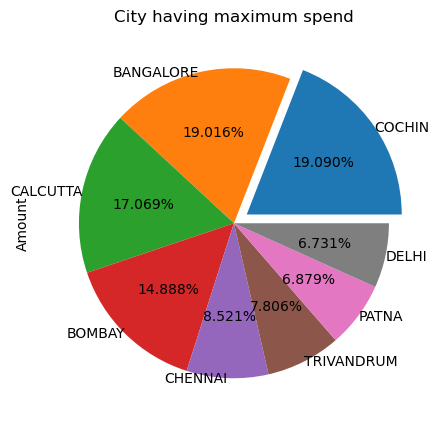

In [28]:
plt.figure(figsize=(5,10))
a.plot(kind='pie',autopct='%1.3f%%',labeldistance=1.0,explode=[0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
plt.title('City having maximum spend')
plt.show()

In [29]:
# 2. h. Which age group is spending more money?

cust_spend.groupby(by='Age',sort=True)['Amount'].sum()
cust_spend['Age_Group'] = pd.cut(cust_spend['Age'], bins=np.arange(18,88,8),labels=['18-26','26-34','34-42','42-50','50-58','58-66','66-74','74-82'],include_lowest=True)
cust_spend

,Customer,Month,Type,Amount,Age,City,Product,Limit,Company,Segment,Monthly,Yearly,Age_Group
0,A1,2004-01-12,JEWELLERY,485470.80,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,Jan,2004,74-82
1,A1,2004-01-03,PETRO,410556.13,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,Jan,2004,74-82
2,A1,2004-01-15,CLOTHES,23740.46,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,Jan,2004,74-82
3,A1,2004-01-25,FOOD,484342.47,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,Jan,2004,74-82
4,A1,2005-01-17,CAMERA,369694.07,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,Jan,2005,74-82
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,A7,2006-05-03,AIR TICKET,500000.00,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC,May,2006,18-26
1496,A7,2005-02-23,CAMERA,500000.00,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC,Feb,2005,18-26
1497,A7,2004-01-12,AUTO,500000.00,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC,Jan,2004,18-26
1498,A7,2004-01-25,TRAIN TICKET,500000.00,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC,Jan,2004,18-26


In [30]:
age = cust_spend.groupby(by='Age_Group')['Amount'].sum()
print('Age Group (', age.idxmax() , ') spends more money')

Age Group ( 26-34 ) spends more money


In [31]:
age

Age_Group
18-26    4.521385e+07
26-34    1.064234e+08
34-42    8.771774e+07
42-50    7.857737e+07
50-58    7.240398e+07
58-66    4.023262e+07
66-74    4.785584e+07
74-82    2.472087e+07
Name: Amount, dtype: float64

In [32]:
# 2. i. Who are the top 10 customers in terms of repayment?

top_10_cust = cust_repay.groupby(by= 'Customer')[['Amount']].sum().sort_values(by="Amount",ascending=False).head(10)
top_10_cust

,Amount
Customer,
A61,10539142.91
A60,9876290.74
A13,9572000.66
A43,8489871.46
A45,8448334.87
A12,8334760.16
A14,7943268.63
A44,7744730.12
A39,7622483.30


In [33]:
# 3. city wise spend on each product on yearly basis

#cust_spend.groupby(by=['Yearly','Product','City'])[['Amount']].sum()

graph = cust_spend.pivot_table(index=['Yearly','City'],columns=['Product'],values='Amount')
graph

Product                     Gold       Platimum         Silver
Yearly City                                                   
2004   BANGALORE   258052.181667  426300.303448  428826.607500
       BOMBAY      291160.563750  446289.897600  457462.639091
       CALCUTTA    219915.911176  429029.556522  500000.000000
       CHENNAI     176603.083333  368455.388421  326410.472000
       COCHIN      215172.063235  390934.127188  444638.570000
       DELHI       215884.230769  347251.148333  469885.143750
       PATNA       296081.128571  371023.200000  384792.443750
       TRIVANDRUM  241510.284000  375111.578000  401933.096000
2005   BANGALORE   222282.120517  412653.708710  421144.602222
       BOMBAY      230333.802051  478263.088182  455362.458182
       CALCUTTA    257583.895000  406935.633611  336268.132500
       CHENNAI     311745.465000  359029.885000  159647.686250
       COCHIN      263274.196304  352066.175227  430942.721538
       DELHI       178622.297273  404905.262222  382936.928182
       PATNA       271051.314167  360403.883750  430004.459500
       TRIVANDRUM  177196.550000  351047.876667  419985.081667
2006   BANGALORE   240612.221800  395031.414231  302424.960741
       BOMBAY      203003.700256  442164.758387  430217.984615
       CALCUTTA    253807.562955  432185.077073  467196.394667
       CHENNAI     245844.420000  348997.446667  500000.000000
       COCHIN      233314.275111  356711.525800  420554.215000
       DELHI       268827.574545  358928.573333  447346.527647
       PATNA       206925.608182  179448.235714  500000.000000
       TRIVANDRUM  273571.087000  421799.902778  418714.329091

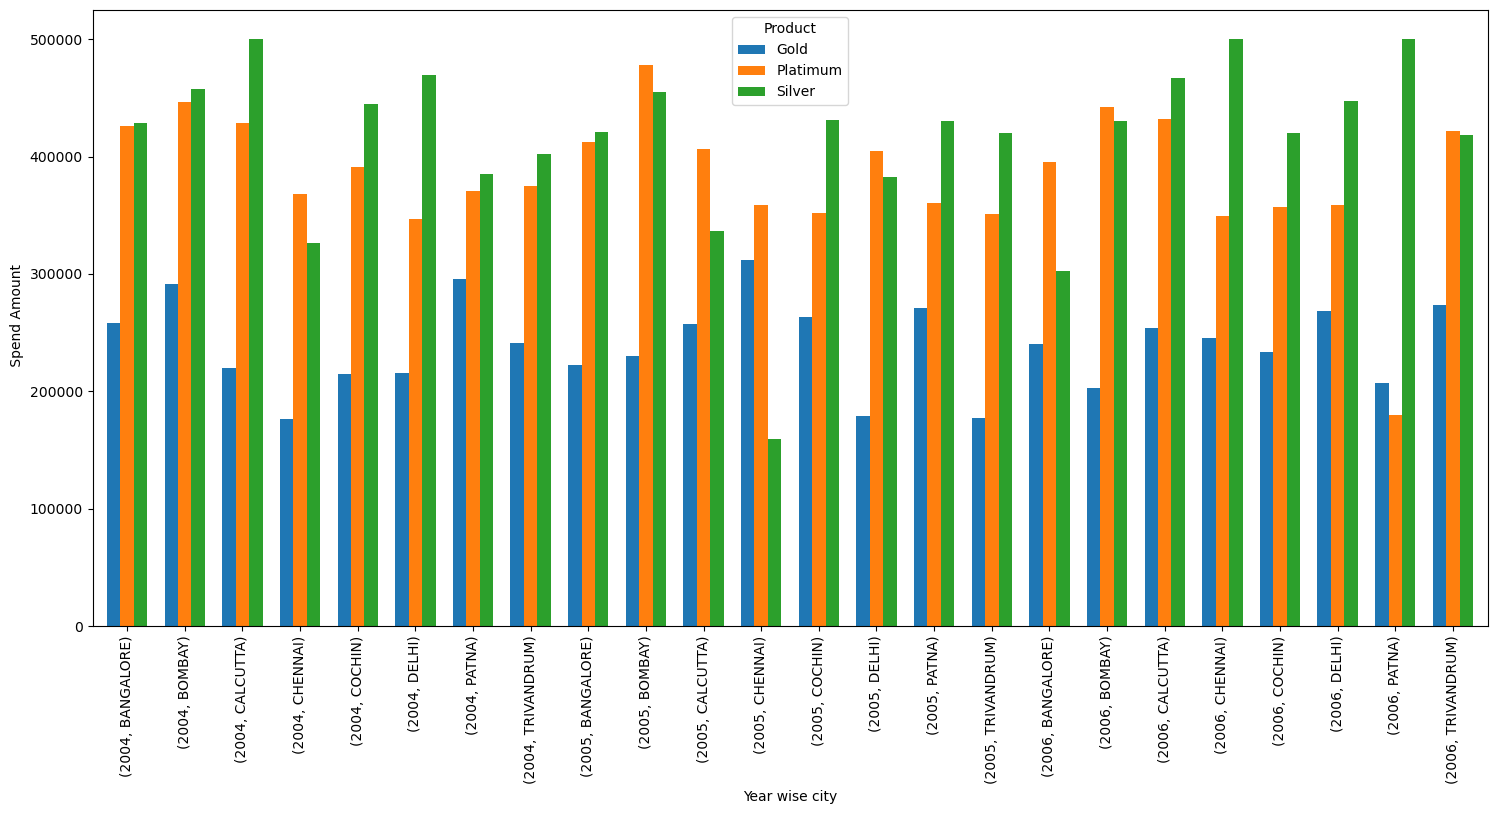

In [34]:
graph.plot(kind='bar',figsize=(18,8),width=0.7)
plt.xlabel('Year wise city')
plt.ylabel(' Spend Amount')
plt.show()

In [35]:
# 4.  a. Monthly comparison of total spends, city wise

cust_spend.pivot_table(values='Amount',index=['Monthly'],columns='City',aggfunc=np.sum)

City,BANGALORE,BOMBAY,CALCUTTA,CHENNAI,COCHIN,DELHI,PATNA,TRIVANDRUM
Monthly,,,,,,,,
Apr,7942974.48,5968782.51,9127500.45,4948655.49,10002735.94,4827234.25,3238179.53,5024289.45
Aug,2090059.95,1066744.75,3033351.52,800875.97,2767306.61,605400.66,869383.64,1398772.94
Dec,1367165.74,1040039.21,1000000.00,223628.27,2349531.55,1292340.52,500000.00,640922.26
Feb,13169482.26,12196975.80,14360538.11,7310814.45,12677875.38,3744059.06,4603331.55,6727119.89
Jan,25286768.84,16613981.33,19099851.40,9821958.36,23414355.54,10364247.95,9866200.55,8519332.49
Jul,4973213.19,1077725.32,2729572.27,1638824.27,2640893.80,500000.00,500000.00,1250483.50
Jun,1780685.40,2072594.97,2788045.31,2729242.16,2990744.07,1861272.59,2996185.13,895336.33
Mar,15622891.07,13147839.50,13084028.04,6018640.21,14150131.53,4967144.52,5937162.61,6622312.01
May,14258099.13,9966936.60,10708238.87,6186195.12,14051074.69,3850319.57,5286583.80,6143530.98


In [36]:
# cust_spend.groupby(by=['Monthly','City'])[['Amount']].sum()

grph = cust_spend.pivot_table(index = ['Monthly'],columns='City',values='Amount',aggfunc='sum')
grph

City,BANGALORE,BOMBAY,CALCUTTA,CHENNAI,COCHIN,DELHI,PATNA,TRIVANDRUM
Monthly,,,,,,,,
Apr,7942974.48,5968782.51,9127500.45,4948655.49,10002735.94,4827234.25,3238179.53,5024289.45
Aug,2090059.95,1066744.75,3033351.52,800875.97,2767306.61,605400.66,869383.64,1398772.94
Dec,1367165.74,1040039.21,1000000.00,223628.27,2349531.55,1292340.52,500000.00,640922.26
Feb,13169482.26,12196975.80,14360538.11,7310814.45,12677875.38,3744059.06,4603331.55,6727119.89
Jan,25286768.84,16613981.33,19099851.40,9821958.36,23414355.54,10364247.95,9866200.55,8519332.49
Jul,4973213.19,1077725.32,2729572.27,1638824.27,2640893.80,500000.00,500000.00,1250483.50
Jun,1780685.40,2072594.97,2788045.31,2729242.16,2990744.07,1861272.59,2996185.13,895336.33
Mar,15622891.07,13147839.50,13084028.04,6018640.21,14150131.53,4967144.52,5937162.61,6622312.01
May,14258099.13,9966936.60,10708238.87,6186195.12,14051074.69,3850319.57,5286583.80,6143530.98


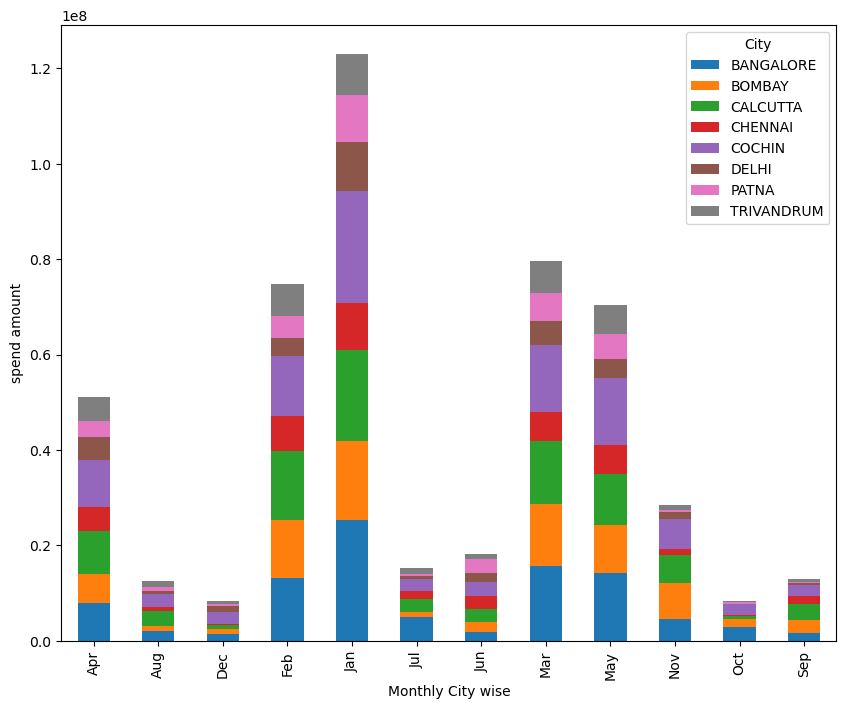

In [58]:
grph.plot(kind='bar',stacked=True,figsize=(10,8),width=0.5)
plt.xlabel('Monthly City wise')
plt.ylabel('spend amount')
plt.show()

In [59]:
# 4.  b. Comparison of yearly spend on air tickets

yearspend = cust_spend.groupby(by=['Yearly','Type'])[['Amount']].sum().reset_index()
air = yearspend.loc[yearspend['Type'] == 'AIR TICKET']
air

,Yearly,Type,Amount
0,2004,AIR TICKET,12637209.35
15,2005,AIR TICKET,18965137.21
30,2006,AIR TICKET,16408455.56


Text(0.5, 1.0, 'Amount spent on air ticket')

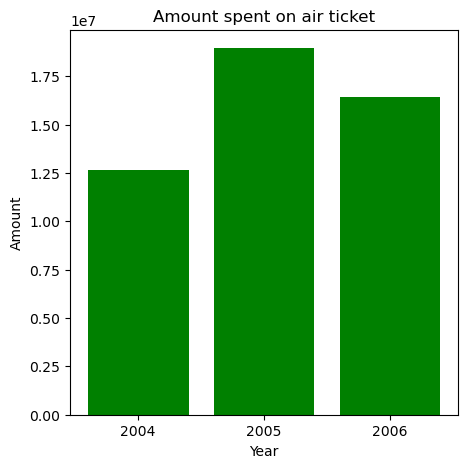

In [60]:
plt.figure(figsize=(5,5),)
plt.bar(x=air['Yearly'],height=air['Amount'],color='Green')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.title('Amount spent on air ticket')

In [61]:
cust_spend

,Customer,Month,Type,Amount,Age,City,Product,Limit,Company,Segment,Monthly,Yearly,Age_Group
0,A1,2004-01-12,JEWELLERY,485470.80,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,Jan,2004,74-82
1,A1,2004-01-03,PETRO,410556.13,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,Jan,2004,74-82
2,A1,2004-01-15,CLOTHES,23740.46,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,Jan,2004,74-82
3,A1,2004-01-25,FOOD,484342.47,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,Jan,2004,74-82
4,A1,2005-01-17,CAMERA,369694.07,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,Jan,2005,74-82
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,A7,2006-05-03,AIR TICKET,500000.00,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC,May,2006,18-26
1496,A7,2005-02-23,CAMERA,500000.00,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC,Feb,2005,18-26
1497,A7,2004-01-12,AUTO,500000.00,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC,Jan,2004,18-26
1498,A7,2004-01-25,TRAIN TICKET,500000.00,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC,Jan,2004,18-26


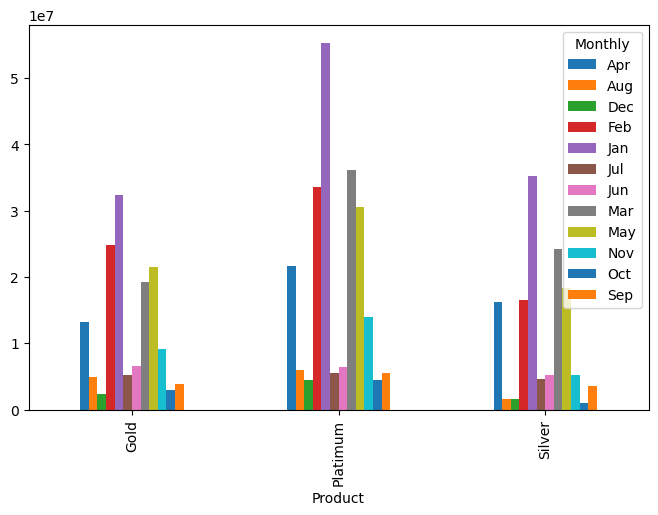

In [70]:
# 4. c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

# The spend is more in january for each product

gg = cust_spend.pivot_table(index='Product',columns=['Monthly'],values='Amount',aggfunc='sum')
gg.plot(kind='bar',figsize=(8,5))
plt.show()

In [64]:
# 5. User Defined function

def top_cust(product,time_period):
    print('Enter the product name and time period for which you want the data')
    if product.lower() == 'gold' and time_period.lower() == 'Monthly':
        table = cust_repay.pivot_table(index=['Product','City','Customer'],columns=['Monthly'],values='Amount',aggfunc='sum')
        result = table.loc[('Gold',['BANGALORE', 'CALCUTTA', 'COCHIN', 'BOMBAY', 'DELHI', 'PATNA', 'CHENNAI', 'TRIVANDRUM']),:]
    elif product.lower() == 'gold' and time_period == 'Yearly':
        table = cust_repay.pivot_table(index=['Product','City','Customer'],columns=['Yearly'],values='Amount',aggfunc='sum')
        result = table.loc[('Gold',['BANGALORE', 'CALCUTTA', 'COCHIN', 'BOMBAY', 'DELHI', 'PATNA', 'CHENNAI', 'TRIVANDRUM']),:]
    elif product.lower() == 'silver' and time_period.lower() == 'Monthly':
        table = cust_repay.pivot_table(index=['Product','City','Customer'],columns=['Monthly'],values='Amount',aggfunc='sum')
        result = table.loc[('Silver',['BANGALORE', 'CALCUTTA', 'COCHIN', 'BOMBAY', 'DELHI', 'PATNA', 'CHENNAI', 'TRIVANDRUM']),:]
    elif product.lower() == 'silver' and time_period.lower() == 'Yearly':
        table = cust_repay.pivot_table(index=['Product','City','Customer'],columns=['Yearly'],values='Amount',aggfunc='sum')
        result = table.loc[('Silver',['BANGALORE', 'CALCUTTA', 'COCHIN', 'BOMBAY', 'DELHI', 'PATNA', 'CHENNAI', 'TRIVANDRUM']),:]
    if product.lower() == 'platinum' and time_period.lower() == 'Monthly':
        table = cust_repay.pivot_table(index=['Product','City','Customer'],columns=['Monthly'],values='Amount',aggfunc='sum')
        result = table.loc[('Platinum',['BANGALORE', 'CALCUTTA', 'COCHIN', 'BOMBAY', 'DELHI', 'PATNA','CHENNAI', 'TRIVANDRUM']),:]
    elif product.lower() == 'platinum' and time_period == 'Yearly':
        table = cust_repay.pivot_table(index=['Product','City','Customer'],columns=['Yearly'],values='Amount',aggfunc='sum')
        result = table.loc[('Platinum',['BANGALORE', 'CALCUTTA', 'COCHIN', 'BOMBAY', 'DELHI', 'PATNA','CHENNAI', 'TRIVANDRUM']),:]
    return result

In [65]:
top_cust('platinum','monthly')

Enter the product name and time period for which you want the data


UnboundLocalError: local variable 'result' referenced before assignment

In [66]:
cust_repay.City.unique()

array(['BANGALORE', 'CALCUTTA', 'COCHIN', 'BOMBAY', 'DELHI', 'PATNA',
       'CHENNAI', 'TRIVANDRUM'], dtype=object)

In [67]:
def summary_report(product,timeperiod):
    print('Give the product name and timeperiod for which you want the data')
    if product.lower()=='gold' and timeperiod.lower()=='monthly':
        pivot = cust_repay.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Gold',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='gold' and timeperiod.lower()=='yearly':
        pivot = cust_repay.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Gold',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='silver' and timeperiod.lower()=='monthly':
        pivot = cust_repay.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Silver',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='silver' and timeperiod.lower()=='yearly':
        pivot = cust_repay.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Silver',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    if product.lower()=='platinum' and timeperiod.lower()=='monthly':
        pivot = cust_repay.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Platinum',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='platinum' and timeperiod.lower()=='yearly':
        pivot = cust_repay.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Platinum',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    return result


In [69]:
summary_report('gold','Monthly')

Give the product name and timeperiod for which you want the data


Monthly                             Apr        Aug        Dec         Feb  \
Product City       Customer                                                 
Gold    BANGALORE  A1         508949.16        NaN        NaN   781873.80   
                   A13        494392.40  873304.51        NaN  2049808.15   
                   A14        812582.20  198623.13  388821.96  1482923.34   
                   A30        425694.16        NaN        NaN  1321469.80   
                   A43        612541.80        NaN        NaN   763846.93   
                   A63              NaN        NaN        NaN         NaN   
                   A81              NaN        NaN        NaN         NaN   
                   A88              NaN        NaN        NaN         NaN   
                   A92        459105.69        NaN        NaN         NaN   
        COCHIN     A11        958466.08  332677.61        NaN  1069789.26   
                   A16        338710.86        NaN        NaN   331143.85   
                   A32        333042.82   99528.43        NaN   851127.91   
                   A45       1435443.21  431769.44  410935.52  1241580.90   
                   A61       3412860.60  197804.13        NaN  1345911.54   
                   A65              NaN        NaN        NaN         NaN   
                   A90        109931.32        NaN        NaN         NaN   
                   A94              NaN        NaN        NaN         NaN   
        CALCUTTA   A10        478747.41        NaN        NaN   652033.51   
                   A15              NaN   17981.25        NaN   516544.51   
                   A29              NaN  534103.41        NaN   627147.67   
                   A31         13054.67        NaN        NaN   962656.24   
                   A60       2397565.91  735660.40        NaN  1403731.08   
                   A89        497237.97        NaN        NaN         NaN   
        BOMBAY     A12        601326.07  120471.17        NaN  1978117.59   
                   A17        391463.29   98341.04  479227.30   374865.01   
                   A42        173199.87        NaN        NaN   476213.23   
                   A62       1115760.01        NaN        NaN   478764.07   
                   A91        247781.00        NaN        NaN         NaN   
        CHENNAI    A27        379529.81  472123.57  136860.63   841114.02   
                   A67              NaN        NaN        NaN         NaN   
        TRIVANDRUM A28        115326.71  437823.07  451630.26   968709.79   
        PATNA      A26        558432.60  398164.37  417177.67  1298000.32   
                   A66              NaN        NaN        NaN         NaN   
                   A95              NaN        NaN        NaN         NaN   
        DELHI      A44        346650.76  539494.72   79696.21   745752.19   
                   A64              NaN        NaN  212614.48         NaN   
                   A82              NaN        NaN        NaN         NaN   
                   A93              NaN        NaN        NaN         NaN   

Monthly                             Jan         Jul        Jun         Mar  \
Product City       Customer                                                  
Gold    BANGALORE  A1        2407806.29   297176.74        NaN         NaN   
                   A13       2014186.98   424603.55  837101.91  1183569.05   
                   A14        993114.87    41962.19   41128.98  1682886.51   
                   A30        608066.49         NaN   72609.24   599331.38   
                   A43       1978038.15   803935.53   23525.91  1378774.72   
                   A63        372179.26         NaN        NaN         NaN   
                   A81              NaN         NaN        NaN   207780.32   
                   A88              NaN         NaN        NaN   146821.30   
                   A92              NaN         NaN        NaN         NaN   
        COCHIN     A11        958556.39   128484.37        Na

In [68]:
summary_report('gold','yearly')

Give the product name and timeperiod for which you want the data


Yearly                             2004        2005        2006
Product City       Customer                                    
Gold    BANGALORE  A1        2359797.84  1529158.77   864735.06
                   A13       2337012.77  3757673.00  3477314.89
                   A14       2770261.30  2491981.61  2681025.72
                   A30        978777.17  2667746.38  2486958.41
                   A43       1906497.47  4006956.60  2576417.39
                   A63        788855.60         NaN   211117.12
                   A81              NaN         NaN   207780.32
                   A88              NaN         NaN   146821.30
                   A92              NaN         NaN   459105.69
        COCHIN     A11        958556.39  2045470.88  2306906.76
                   A16       1122211.16  1226247.16  1911369.63
                   A32        344312.67   696673.46  1517308.65
                   A45       2557947.39  4042447.57  1847939.91
                   A61       2518154.95  4276860.55  3744127.41
                   A65        468922.60   230667.34         NaN
                   A90              NaN         NaN   109931.32
                   A94        153465.89         NaN         NaN
        CALCUTTA   A10        892190.53  1246843.93  1556613.06
                   A15       1051502.61  1720768.79  2783141.43
                   A29       1376793.94  1706779.22  3434298.00
                   A31        407599.13  1448641.71  1527798.41
                   A60       2890721.81  3742856.10  3242712.83
                   A89              NaN         NaN   497237.97
        BOMBAY     A12       2339080.90  2877588.30  3118090.96
                   A17       1425448.02   731143.83  3127783.14
                   A42       3045914.71  3125758.43  1443787.72
                   A62       1744114.25  1541617.21  1684085.69
                   A91              NaN         NaN   247781.00
        CHENNAI    A27       1842823.04  2782591.71  2387485.81
                   A67         67845.60    55638.77         NaN
        TRIVANDRUM A28        965108.49  2827009.82  3376614.65
        PATNA      A26       1490427.84  2433837.95  3330421.30
                   A66        477039.78         NaN   113094.58
                   A95        369405.96         NaN         NaN
        DELHI      A44       2149383.50  4165317.77  1430028.85
                   A64              NaN         NaN   323229.09
                   A82              NaN         NaN   342200.74
                   A93        342326.14         NaN         NaN

In [78]:
## Another method

def topcust(prod_cat,timeperiod):
    prod_cat=str(input("Please Enter Product either in Gold/Silver/Platinum: "))
    time_period=input("Please Enter Time Period and time period should be in yearly/monthly: ")
    
    df = cust_repay.loc[(cust_repay.Product.str.lower() == prod_cat) &((cust_repay.Monthly == timeperiod) | (cust_repay.Yearly == timeperiod))]
    
    df = df.groupby(by=['Customer','City','Product','Month']).Amount.sum().reset_index().sort_values('Amount',ascending=False).head(10)
    
    return df.head(10)

In [79]:
topcust('Gold','Monthly')

Please Enter Product either in Gold/Silver/Platinum: gold
Please Enter Time Period and time period should be in yearly/monthly: Monthly


,Customer,City,Product,Month,Amount
